In [18]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

In [19]:
#import the dataset
df = pd.read_csv("archive/Train.csv")
print(df.head())
df["full_path"] = df["Path"].apply(lambda p: os.path.join("archive", p))

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  


In [20]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [21]:
df.isna().sum()

Width        0
Height       0
Roi.X1       0
Roi.Y1       0
Roi.X2       0
Roi.Y2       0
ClassId      0
Path         0
full_path    0
dtype: int64

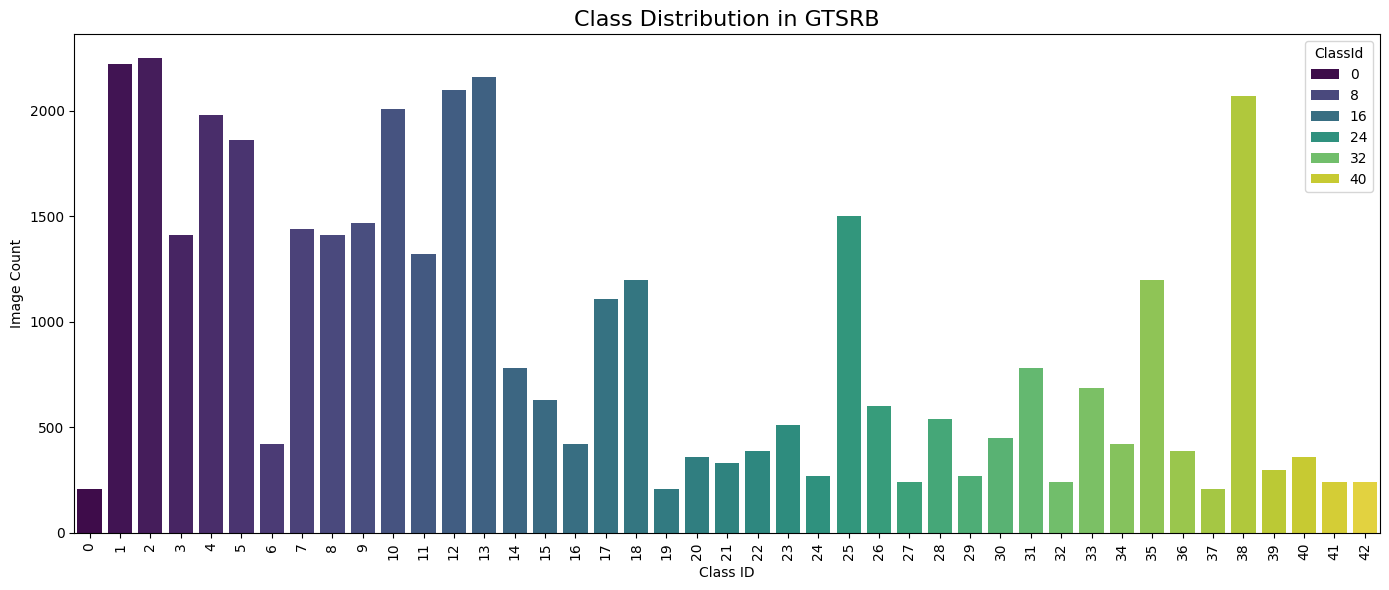

In [22]:
#count of images in eeach class
plt.figure(figsize=(14,6))
sns.countplot(x="ClassId", data=df, palette="viridis", hue="ClassId")
plt.title("Class Distribution in GTSRB", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Class ID")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

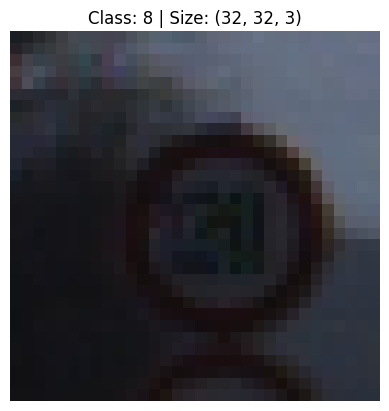

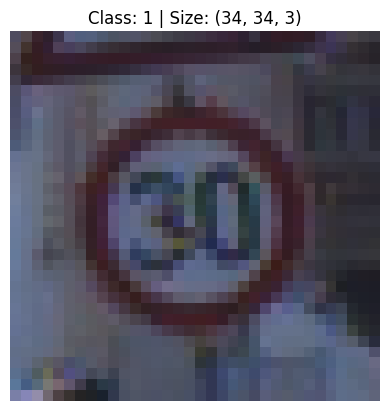

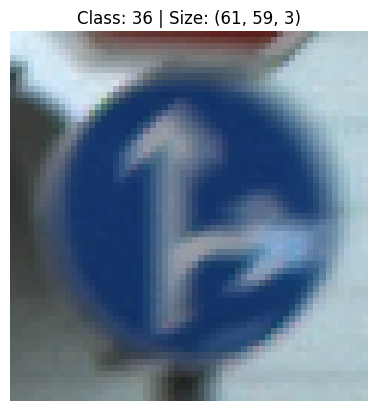

In [23]:
#display sample images
sample_df = df.sample(3)
for _, row in sample_df.iterrows():
    img = cv2.imread(row.full_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Class: {row.ClassId} | Size: {img.shape}")
    plt.axis("off")
    plt.show()

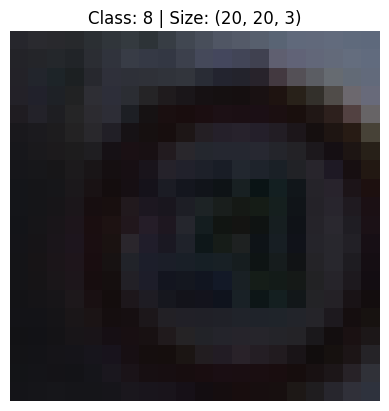

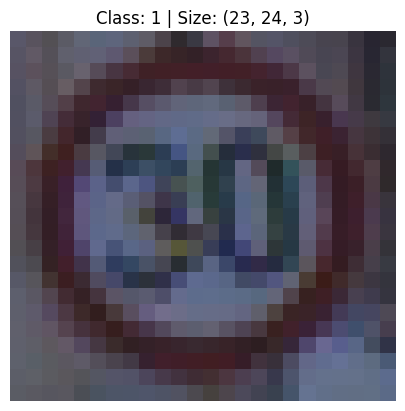

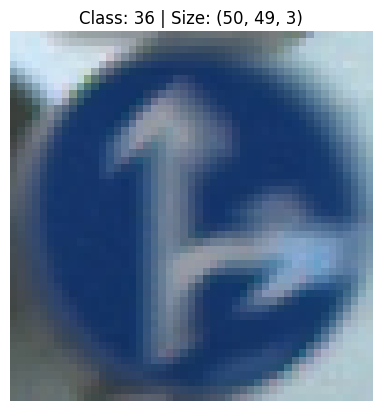

In [24]:
#cropped for the exact sign

for _, row in sample_df.iterrows():
    img = cv2.imread(row.full_path)
    x1, y1, x2, y2 = int(row["Roi.X1"]), int(row["Roi.Y1"]), int(row["Roi.X2"]), int(row["Roi.Y2"])
    cropped = img[y1:y2, x1:x2]
    img_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Class: {row.ClassId} | Size: {cropped.shape}")
    plt.axis("off")
    plt.show()